In [1]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
from PIL import Image
from matplotlib.pyplot import imshow
import os

In [2]:
# load audio file with given sample rate
y, sr = librosa.load('genres/disco/disco.00028.wav', sr = 22050)

In [3]:
Audio(y, rate=sr)

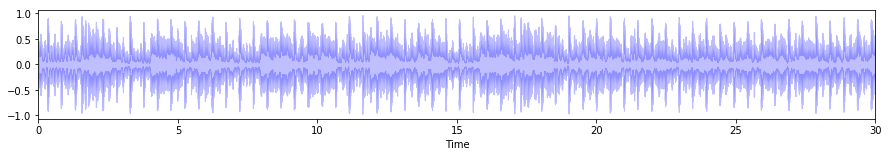

In [4]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                         sr = sr, 
                         max_sr = 1000, 
                         alpha = 0.25, 
                         color = 'blue')

Text(0.5, 1.0, 'Disco')

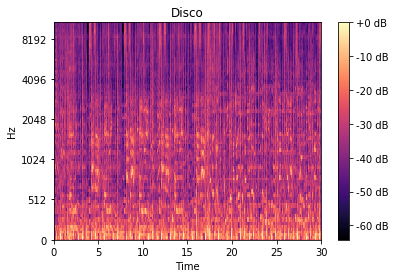

In [5]:
# MEL spectrogram using the default values of n_fft, hop_lebgth, n_mels and power
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=96, power=2)
# creating log scale
log_power = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Disco')

In [37]:
save_path = 'test.jpg'

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), cmap=cm.jet)
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
pylab.close()

In [51]:
mel.shape

(128, 1293)

In [10]:
IMG_DIR = 'spectrogram_images/'

In [17]:
for i, f in enumerate(paths):
    try:
        # Read wav-file
        y, sr = librosa.load(f, sr = 22050) # Use the default sampling rate of 22,050 Hz
        
        # Compute spectrogram
        M = librosa.feature.melspectrogram(y, sr, # frequencies and sample rate
                                           n_fft=2048, # default value
                                           hop_length=512, # default value
                                           power = 2) # squared amplitude, default value
        
        # Convert a power spectrogram (amplitude squared) to decibel (dB) units
        log_power = librosa.power_to_db(M, ref=np.max)
        
        # Plotting the spectrogram as a plain picture without scale or legend
        pylab.figure(figsize=(5,5))
        pylab.axis('off')
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
        librosa.display.specshow(log_power, cmap=cm.jet)
        savepath = IMG_DIR + names[i] + '.jpg'
        pylab.savefig(savepath, bbox_inches=None, pad_inches=0)
        pylab.close()

    except Exception as e:
        print(f, e)
        pass

In [6]:
# Define function to create arrays for filepath and filename
def path_func(number):
    paths = []
    names = []
    
    # Define root path
    directory = os.fsencode('genres/')
    
    # iterate through root path
    for folder in os.listdir(directory):
        foldername = os.fsdecode(folder)
        # skip folder created by jupyter
        if not foldername.startswith('.'):
            count = 0
            # iterate through folders within root path
            for file in os.listdir('genres/' + foldername):
                # limit the number of files per subfolder
                if count < number:
                    filename = os.fsdecode(file)
                    # generate path to file
                    path = 'genres/'+foldername+'/'+filename
                    paths.append(path)
                    names.append(filename)
                    count += 1
    return(paths, names)

In [15]:
paths, names = path_func(100)

In [24]:
from PIL import Image

im = Image.open('spectogram_images_small10/country.00000.wav.jpg')
width, height = im.size
print(width, height)

360 360
